In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import torch
import pandas as pd
import pathlib
from pathlib import Path
import json
import argparse
import sys


from CVAE_testbed.utils.greedy_encoding_plots import make_plot_encoding_greedy
from CVAE_testbed.utils.encoding_plots import make_plot_encoding
from CVAE_testbed.models.model_loader import ModelLoader
from CVAE_testbed.bin.CVAE_train import get_model
from CVAE_testbed.utils import str_to_object
from CVAE_testbed.utils.compare_plots import compare_plots_best_performing, plot_single_model_multiple_epoch, plot_multiple_model_multiple_epoch

In [2]:
# path_save_dir = "../../scripts/outputs/baseline_results_swissroll/2019:09:05:14:54:20/"
# path_save_dir = "../../scripts/outputs/baseline_results/2019:09:06:09:25:42/"
# path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/aics_features/159_features/new/2019:09:06:11:38:11/"

#path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/aics_features/102_features/2019:09:06:12:50:46/"

path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/aics_features/159_features/new2/2019:09:06:12:47:55/"


#path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/baseline_results_projected/new/2019:09:06:10:48:28/"

In [3]:

stats = pd.read_csv(path_save_dir / Path('first_features.csv'))

stats_2 = pd.read_csv(path_save_dir / Path('selected_features.csv'))

(149, 159)

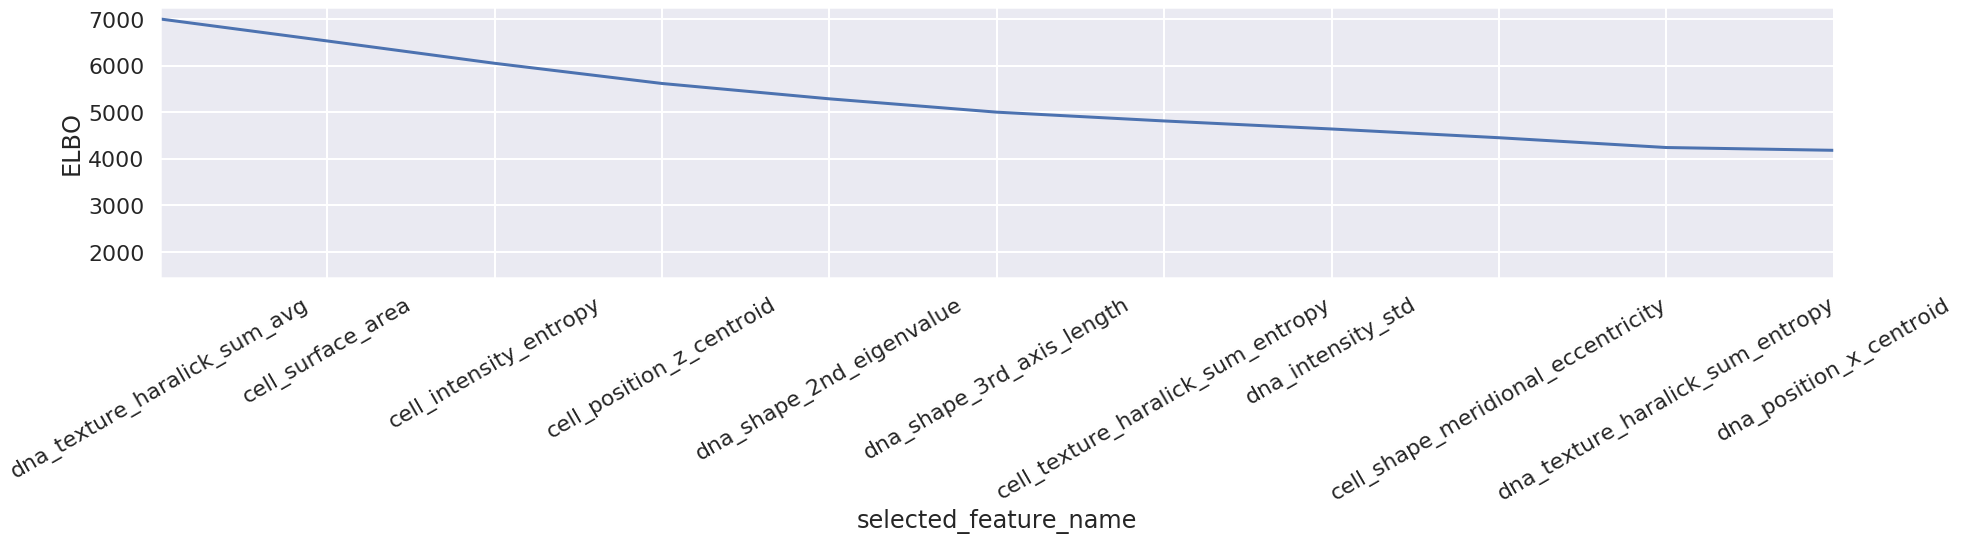

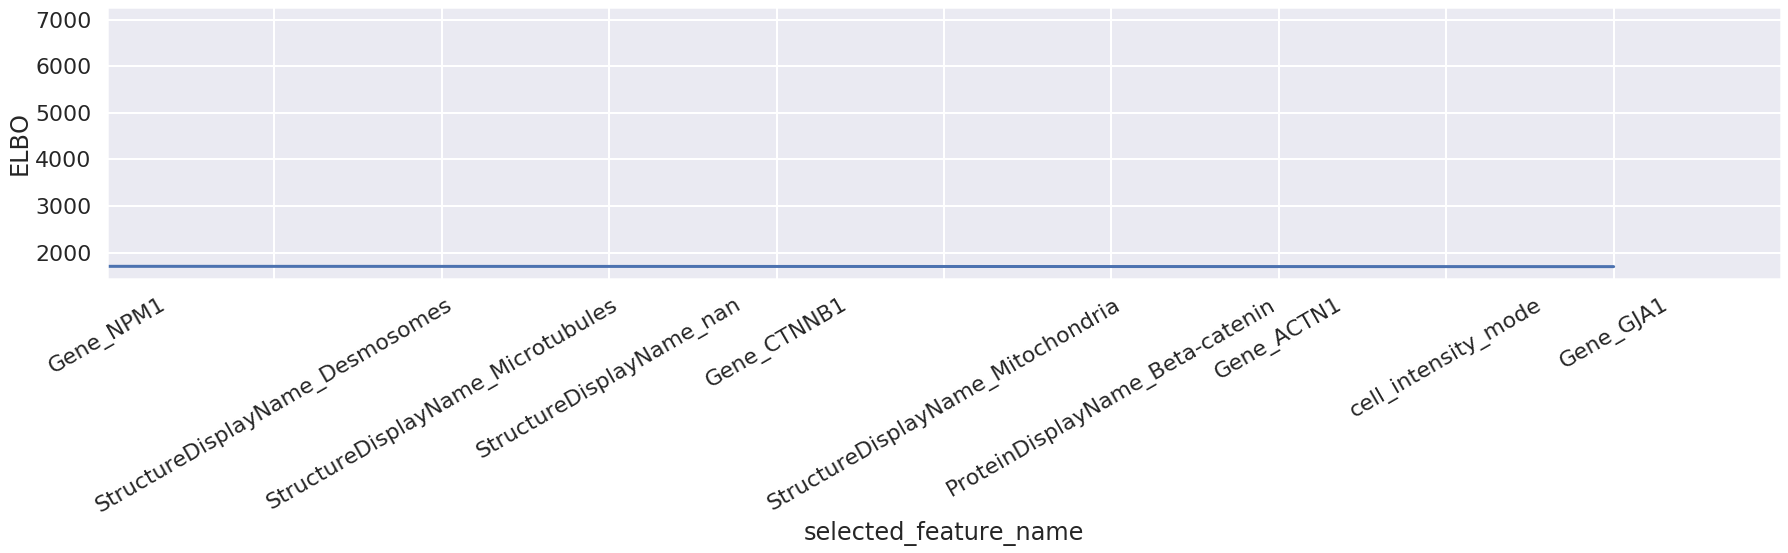

In [4]:
sns.set_context('poster')
fig, ax = plt.subplots(1,1,figsize = (30,5))
stats.sort_values(by='ELBO', ascending=False, inplace=True)
bar_fig = sns.lineplot(ax = ax,data=stats, x = 'selected_feature_name', y = 'ELBO', sort=False)
for item in bar_fig.get_xticklabels():
    item.set_rotation(30)
ax.set_xlim([0, 10])

sns.set_context('poster')
fig, ax = plt.subplots(1,1,figsize = (30,5))
stats.sort_values(by='ELBO', ascending=False, inplace=True)
bar_fig = sns.lineplot(ax = ax,data=stats, x = 'selected_feature_name', y = 'ELBO', sort=False)
for item in bar_fig.get_xticklabels():
    item.set_rotation(30)
ax.set_xlim([149, 159])

In [5]:
this_json = json.loads(open(path_save_dir + 'training_options.json').read())

In [6]:
this_json

{'batch_size': 64,
 'num_batches': 1000,
 'beta_vae': 10.0,
 'json_quilt_path': '/home/ritvik.vasan/test/',
 'binary_real_one_hot_parameters': {'binary_range': [0, 1],
  'binary_loss': 'BCE',
  'real_range': [1, 103],
  'real loss': 'MSE',
  'one_hot_range': [103, 159],
  'one_hot_loss': 'CE'},
 'config_path': '/home/ritvik.vasan/config.json',
 'C_vae': 0,
 'dataloader': 'CVAE_testbed.datasets.quilt_aics_features.QuiltAicsFeatures',
 'gpu_id': 1,
 'loss_fn': 'CVAE_testbed.losses.ELBO.combined_loss',
 'lr': 0.001,
 'model_fn': 'CVAE_testbed.models.CVAE_baseline.CVAE',
 'model_kwargs': {'x_dim': 159,
  'c_dim': 318,
  'enc_layers': [159, 256, 256, 256, 256, 256, 512, 512],
  'dec_layers': [512, 512, 256, 256, 256, 256, 256, 159]},
 'post_plot_kwargs': {'latent_space_colorbar': 'no'},
 'n_epochs': 30,
 'data_type': 'aics_features',
 'path_save_dir': './outputs/aics_features/159_features/new2/2019:09:06:12:47:55'}

In [7]:
args = argparse.Namespace()
argparse_dict = vars(args)
argparse_dict.update(this_json)

In [8]:
device = (
    torch.device("cuda", args.gpu_id)
    if torch.cuda.is_available()
    else torch.device("cpu")
)

In [9]:
num_batches = this_json['num_batches']
batch_size = this_json['batch_size']
dataloader = this_json['dataloader']
model_kwargs = this_json['model_kwargs']
gpu_id = this_json['gpu_id']
model_fn = this_json['model_fn']

In [10]:
model = get_model(model_fn, model_kwargs).to(device)


In [11]:
path_weights = path_save_dir / Path('weights.pt')
model.load_state_dict(torch.load(path_weights))
model.eval()

CVAE(
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (encoder_net): Sequential(
    (0): Linear(in_features=477, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReL

In [12]:
load_data = str_to_object(dataloader)

In [13]:
model_kwargs

{'x_dim': 159,
 'c_dim': 318,
 'enc_layers': [159, 256, 256, 256, 256, 256, 512, 512],
 'dec_layers': [512, 512, 256, 256, 256, 256, 256, 159]}

In [14]:
this_dataloader = load_data(
    num_batches,
    batch_size,
    model_kwargs,
    corr=False,
    train=False,
    mask=False,
)

(38648, 103)
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([0]) torch.Size([0])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([1, 64, 159]) torch.Size([1, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([2, 64, 159]) torch.Size([2, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([3, 64, 159]) torch.Size([3, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([4, 64, 159]) torch.Size([4, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([5, 64, 159]) torch.Size([5, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([6, 64, 159]) torch.Size([6, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([7, 64, 159]) torch.Size([7, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([8, 64, 159]) torch.Size([8, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([9, 64, 159]) torch.Size([9, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([10, 64, 1

torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([120, 64, 159]) torch.Size([120, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([121, 64, 159]) torch.Size([121, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([122, 64, 159]) torch.Size([122, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([123, 64, 159]) torch.Size([123, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([124, 64, 159]) torch.Size([124, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([125, 64, 159]) torch.Size([125, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([126, 64, 159]) torch.Size([126, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([127, 64, 159]) torch.Size([127, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([128, 64, 159]) torch.Size([128, 64, 159])
torch.Size([64, 159]) torch.Size([64, 159])
torch.Size([129, 64, 159]) torch.Size([129, 64, 159])
torch.Size([64, 159]

torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([212, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([213, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([214, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([215, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([216, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([217, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([218, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([219, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([220, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([221, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Si

torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([299, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([300, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([301, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([302, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([303, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([304, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([305, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([306, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([307, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([308, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Si

torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([391, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([392, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([393, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([394, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([395, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([396, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([397, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([398, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([399, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Size([0, 159])
torch.Size([400, 64, 159]) torch.Size([135, 64, 159])
torch.Size([64, 159]) torch.Si

In [15]:
df = this_dataloader.get_PCA_features(0.94)

In [16]:
df

,0,1
0,PC0,dna_intensity_std
1,PC1,cell_texture_haralick_sum_avg
2,PC2,dna_surface_area
3,PC3,dna_position_highest_z
4,PC4,cell_texture_haralick_info_corr1
5,PC5,cell_shape_2nd_eigenvalue
6,PC6,dna_cell_struct_cell_min_ratio
7,PC7,dna_cell_struct_cell_maj_ratio
8,PC8,cell_position_lowest_z
9,PC9,dna_cell_struct_cell_distal_ratio


In [16]:
make_fid_plot = str_to_object(
        "CVAE_testbed.utils.FID_score.make_plot_FID"
        )

In [17]:
X_test, C_test, Cond_indices_test = this_dataloader.get_all_items()

In [22]:
import sys
sys.path.insert(0, '~/Github/cookiecutter/CVAE_testbed/scripts/')

In [24]:
csv_greedy_features = pd.read_csv('~/Github/cookiecutter/CVAE_testbed/scripts/outputs/aics_features/159_features/new2/2019:09:06:12:47:55' + '/selected_features.csv')

In [27]:
path_save_dir = './outputs/aics_features/159_features/new2/2019:09:06:12:47:55'

In [29]:
csv_greedy_features = pd.read_csv('~/Github/cookiecutter/CVAE_testbed/scripts' + path_save_dir[1:] + '/selected_features.csv')

In [30]:
csv_greedy_features

,Unnamed: 0,selected_feature_number,selected_feature_name,ELBO,RCL,KLD
0,0,NaN,NaN,8033.232910,8033.194336,0.00387
1,1,50.0,dna_texture_haralick_sum_avg,7003.476562,7003.437988,0.00387
2,2,59.0,cell_surface_area,6530.489258,6530.450684,0.00387
3,3,89.0,cell_intensity_entropy,6050.940430,6050.901855,0.00387
4,4,82.0,cell_position_z_centroid,5617.629395,5617.590820,0.00387
5,5,28.0,dna_shape_2nd_eigenvalue,5288.166504,5288.127930,0.00387
6,6,26.0,dna_shape_3rd_axis_length,5002.007812,5001.969238,0.00387
7,7,97.0,cell_texture_haralick_sum_entropy,4813.247559,4813.208984,0.00387
8,8,43.0,dna_intensity_std,4640.800781,4640.762207,0.00387
9,9,75.0,cell_shape_meridional_eccentricity,4453.299805,4453.261230,0.00387


In [36]:
import math
conds = [i for i in csv_greedy_features['selected_feature_number'] if not math.isnan(i)]

In [37]:
conds

[50.0,
 59.0,
 89.0,
 82.0,
 28.0,
 26.0,
 97.0,
 43.0,
 75.0,
 52.0,
 35.0,
 29.0,
 94.0,
 18.0,
 54.0,
 15.0,
 56.0,
 102.0,
 73.0,
 3.0,
 4.0,
 98.0,
 72.0,
 22.0,
 42.0,
 31.0,
 25.0,
 62.0,
 21.0,
 38.0,
 58.0,
 81.0,
 6.0,
 60.0,
 37.0,
 12.0,
 5.0,
 100.0,
 61.0,
 7.0,
 8.0,
 123.0,
 40.0,
 70.0,
 74.0,
 87.0,
 64.0,
 92.0,
 68.0,
 16.0,
 1.0,
 27.0,
 63.0,
 66.0,
 79.0,
 91.0,
 17.0,
 36.0,
 88.0,
 10.0,
 77.0,
 23.0,
 65.0,
 133.0,
 137.0,
 57.0,
 128.0,
 39.0,
 55.0,
 11.0,
 108.0,
 69.0,
 46.0,
 24.0,
 84.0,
 67.0,
 152.0,
 30.0,
 127.0,
 144.0,
 155.0,
 78.0,
 49.0,
 33.0,
 14.0,
 71.0,
 153.0,
 19.0,
 139.0,
 95.0,
 48.0,
 90.0,
 20.0,
 2.0,
 99.0,
 47.0,
 96.0,
 157.0,
 147.0,
 93.0,
 9.0,
 141.0,
 80.0,
 121.0,
 41.0,
 101.0,
 118.0,
 148.0,
 107.0,
 114.0,
 131.0,
 44.0,
 85.0,
 122.0,
 117.0,
 13.0,
 34.0,
 76.0,
 132.0,
 129.0,
 112.0,
 83.0,
 103.0,
 156.0,
 149.0,
 32.0,
 142.0,
 138.0,
 45.0,
 116.0,
 110.0,
 136.0,
 154.0,
 53.0,
 51.0,
 119.0,
 146.0,
 125.0,
 14

[50.0, 59.0, 89.0, 82.0, 28.0, 26.0, 97.0, 43.0, 75.0, 52.0, 35.0, 29.0, 94.0, 18.0, 54.0, 15.0, 56.0, 102.0, 73.0, 3.0, 4.0, 98.0, 72.0, 22.0, 42.0, 31.0, 25.0, 62.0, 21.0, 38.0, 58.0, 81.0, 6.0, 60.0, 37.0, 12.0, 5.0, 100.0, 61.0, 7.0, 8.0, 123.0, 40.0, 70.0, 74.0, 87.0, 64.0, 92.0, 68.0, 16.0, 1.0, 27.0, 63.0, 66.0, 79.0, 91.0, 17.0, 36.0, 88.0, 10.0, 77.0, 23.0, 65.0, 133.0, 137.0, 57.0, 128.0, 39.0, 55.0, 11.0, 108.0, 69.0, 46.0, 24.0, 84.0, 67.0, 152.0, 30.0, 127.0, 144.0, 155.0, 78.0, 49.0, 33.0, 14.0, 71.0, 153.0, 19.0, 139.0, 95.0, 48.0, 90.0, 20.0, 2.0, 99.0, 47.0, 96.0, 157.0, 147.0, 93.0, 9.0, 141.0, 80.0, 121.0, 41.0, 101.0, 118.0, 148.0, 107.0, 114.0, 131.0, 44.0, 85.0, 122.0, 117.0, 13.0, 34.0, 76.0, 132.0, 129.0, 112.0, 83.0, 103.0, 156.0, 149.0, 32.0, 142.0, 138.0, 45.0, 116.0, 110.0, 136.0, 154.0, 53.0, 51.0, 119.0, 146.0, 125.0, 145.0, 130.0, 126.0, 106.0, 135.0, 134.0, 113.0, 105.0, 86.0, 104.0, 140.0, 158.0, 124.0, 120.0, 115.0, 143.0, 0.0, 111.0, 109.0, 151.0, 150

torch.Size([8640, 159]) torch.Size([8640, 512]) torch.Size([8640, 318])
torch.Size([8640, 159])
torch.Size([8640, 159]) torch.Size([8640, 512]) torch.Size([8640, 318])
torch.Size([8640, 159])
torch.Size([8640, 159]) torch.Size([8640, 512]) torch.Size([8640, 318])
torch.Size([8640, 159])
torch.Size([8640, 159]) torch.Size([8640, 512]) torch.Size([8640, 318])
torch.Size([8640, 159])
torch.Size([8640, 159]) torch.Size([8640, 512]) torch.Size([8640, 318])
torch.Size([8640, 159])
torch.Size([8640, 159]) torch.Size([8640, 512]) torch.Size([8640, 318])
torch.Size([8640, 159])
torch.Size([8640, 159]) torch.Size([8640, 512]) torch.Size([8640, 318])
torch.Size([8640, 159])
torch.Size([8640, 159]) torch.Size([8640, 512]) torch.Size([8640, 318])
torch.Size([8640, 159])
torch.Size([8640, 159]) torch.Size([8640, 512]) torch.Size([8640, 318])
torch.Size([8640, 159])
torch.Size([8640, 159]) torch.Size([8640, 512]) torch.Size([8640, 318])
torch.Size([8640, 159])
torch.Size([8640, 159]) torch.Size([8640

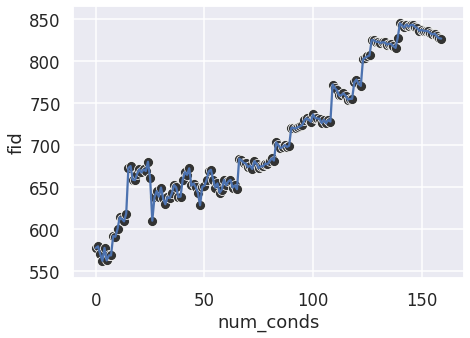

In [18]:
make_fid_plot(args, model, X_test[:,:], C_test[:,:], save=False)

In [13]:
non_cat, cat = this_dataloader.get_dataframes()

In [123]:
total = pd.merge(non_cat, cat, on=non_cat.index)

In [134]:
total = total[[i for i in total.columns if i not in ['key_0']]]

In [135]:
x_features = total.values

In [154]:
x_features.shape[-1]

159

In [137]:
from sklearn.decomposition import PCA
model = PCA(n_components=102).fit(x_features)

In [138]:
x_pc = model.transform(x_features)

In [139]:
x_pc

array([[ 1.95022535e+00,  6.53021737e+00,  1.12969433e+00, ...,
        -4.98530359e-02, -7.82564750e-03,  1.14795067e-01],
       [-2.73623678e+00,  1.27635572e+00,  2.84539735e+00, ...,
        -8.94253315e-02, -3.17645332e-02,  6.57676042e-02],
       [ 6.72717718e-02,  2.14365739e+00,  1.99837154e+00, ...,
         8.93467547e-03,  5.43977672e-02,  1.49840996e-02],
       ...,
       [-6.44300349e+00,  3.55038862e+00,  2.12073575e+00, ...,
        -1.24712467e-01, -1.03181648e-01, -1.79249398e-01],
       [-5.82335985e+00,  1.21596038e-01, -2.91580388e+00, ...,
        -9.01058831e-03, -2.44410175e-02,  2.88511524e-03],
       [-6.84239189e-01, -2.77360269e+00, -3.47736312e+00, ...,
        -9.40055127e-02, -6.70640600e-02,  1.67042584e-02]])

In [140]:
n_pcs = model.components_.shape[0]

In [141]:
n_pcs

102

In [142]:
model.explained_variance_ratio_

array([1.43424049e-01, 1.11620576e-01, 1.05873417e-01, 7.71312803e-02,
       3.49597730e-02, 3.21940153e-02, 2.82680150e-02, 2.72239887e-02,
       2.32796021e-02, 2.07484985e-02, 1.81266575e-02, 1.71735176e-02,
       1.62347684e-02, 1.55873344e-02, 1.51259387e-02, 1.45131728e-02,
       1.39842484e-02, 1.33376373e-02, 1.22545410e-02, 1.20776713e-02,
       1.11094711e-02, 1.10321871e-02, 1.07008764e-02, 1.04584987e-02,
       9.95989974e-03, 9.57769590e-03, 9.30132893e-03, 9.10320123e-03,
       8.86351261e-03, 8.60909016e-03, 8.24547039e-03, 8.00552133e-03,
       7.69330683e-03, 7.02864482e-03, 6.72092321e-03, 6.47650106e-03,
       6.28214023e-03, 6.12087221e-03, 5.92848566e-03, 4.82067062e-03,
       4.28256043e-03, 4.18216522e-03, 3.85216607e-03, 3.73543047e-03,
       3.60101822e-03, 3.30129618e-03, 2.93342654e-03, 2.86941234e-03,
       2.68156943e-03, 2.56888534e-03, 2.46823222e-03, 2.28821488e-03,
       2.05003107e-03, 1.88611913e-03, 1.73803887e-03, 1.70620014e-03,
      

In [143]:
import numpy as np
np.sum(model.explained_variance_ratio_)

0.9994404607062369

In [144]:
print(abs(model.components_))

[[2.71958870e-02 2.09920578e-03 2.37380034e-02 ... 2.31440065e-03
  6.96794802e-04 2.17363339e-03]
 [9.80615219e-03 2.61625701e-03 9.57193301e-04 ... 1.18768722e-03
  5.25976164e-04 1.34606369e-03]
 [2.07182574e-02 2.82315805e-02 5.33396699e-03 ... 6.42160413e-04
  8.81866340e-04 1.98654025e-03]
 ...
 [4.56995996e-01 1.82157766e-03 3.18465715e-02 ... 1.10358908e-03
  2.17148596e-03 1.20607653e-02]
 [6.69898861e-01 1.93645200e-03 1.68740920e-02 ... 2.43106111e-03
  8.77157431e-03 7.50379987e-03]
 [3.66442751e-01 7.79094906e-03 3.22744367e-02 ... 1.17118999e-02
  1.86383797e-03 4.30404979e-03]]


In [145]:
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]


In [148]:
initial_features_names = total.columns.values

In [149]:
most_important_names = [initial_features_names[most_important[i]] for i in range(n_pcs)]

In [150]:
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

In [151]:
df = pd.DataFrame(dic.items())

In [152]:
df

,0,1
0,PC0,dna_intensity_std
1,PC1,cell_texture_haralick_sum_avg
2,PC2,dna_surface_area
3,PC3,dna_position_highest_z
4,PC4,cell_texture_haralick_info_corr1
5,PC5,cell_shape_2nd_eigenvalue
6,PC6,dna_cell_struct_cell_min_ratio
7,PC7,dna_cell_struct_cell_maj_ratio
8,PC8,cell_position_lowest_z
9,PC9,dna_cell_struct_cell_distal_ratio


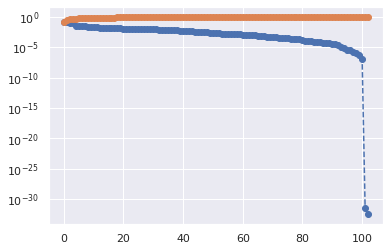

In [16]:
import sklearn.datasets as ds
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_trafo = PCA().fit(non_cat);

plt.semilogy(pca_trafo.explained_variance_ratio_, '--o');
plt.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--o');

In [30]:
non_cat.columns = names[:103]

In [31]:
non_cat

,Interphase and Mitotic Stages [stage],dna_cell_struct_cyto_distal_ratio,dna_cell_struct_nuc_distal_ratio,dna_cell_struct_cell_distal_ratio,dna_cell_struct_cyto_z_ratio,dna_cell_struct_nuc_z_ratio,dna_cell_struct_cell_z_ratio,dna_cell_struct_cyto_maj_ratio,dna_cell_struct_nuc_maj_ratio,dna_cell_struct_cell_maj_ratio,...,cell_texture_haralick_variance,cell_texture_haralick_inv_diff_moment,cell_texture_haralick_sum_avg,cell_texture_haralick_sum_var,cell_texture_haralick_sum_entropy,cell_texture_haralick_entropy,cell_texture_haralick_diff_var,cell_texture_haralick_diff_entropy,cell_texture_haralick_info_corr1,cell_texture_haralick_info_corr2
0,0.0,0.284450,-0.470277,0.356214,0.168070,-0.380149,0.169419,0.061844,-0.008929,-0.133624,...,-1.100697,0.832093,-1.336025,-1.068166,-1.494452,-1.390234,0.730677,-1.066230,0.624252,-1.244992
1,0.0,-0.797684,-0.227923,0.404265,0.333270,1.427651,0.775340,2.015073,-0.189117,1.771141,...,-0.614138,-0.939909,-0.342084,-0.665817,-0.220823,0.215286,-0.299556,0.620079,1.638767,-2.052044
2,0.0,-1.097843,-0.536562,0.715539,0.568874,0.836930,0.992429,-0.506027,0.460316,-0.464566,...,-0.574679,-0.265940,-0.502970,-0.575016,-0.372341,-0.175909,-0.274210,-0.104056,0.792948,-0.733798
3,0.0,0.403710,-0.644035,0.571458,-1.337702,-0.065012,-1.298771,0.164895,-0.934076,0.250985,...,-0.278846,1.464587,0.175893,-0.194050,0.388642,-0.329981,0.105750,-1.405548,-2.904982,1.576076
4,0.0,-0.244580,-0.637035,0.615398,-0.068432,2.100247,0.410881,1.621870,1.755957,2.055801,...,-0.401395,0.934634,-0.074135,-0.350978,0.160067,-0.274020,0.066151,-0.943946,-1.783670,1.274942
5,0.0,-0.769720,-0.541256,0.195561,0.292975,-0.200381,0.234052,0.360428,-0.277282,0.452535,...,-0.366865,-0.365700,-0.412367,-0.398100,-0.170563,0.016948,-0.319927,0.326534,0.857014,-0.713175
6,0.0,0.505335,2.021823,-2.227599,-1.055921,1.346178,0.640674,2.104762,0.216271,0.054590,...,-0.395602,0.365801,-0.168814,-0.341225,0.067254,-0.120600,0.046871,-0.457022,-0.784707,0.818646
7,0.0,1.566206,-0.574626,0.480305,-0.801155,-1.607638,-1.014865,-0.304351,-0.922772,-0.254825,...,-0.636639,-0.262965,-0.087994,-0.608062,0.061362,0.074215,-0.086049,-0.251711,0.007217,0.173143
8,0.0,0.713558,-0.662804,0.783588,-0.732271,-1.474031,-0.668872,-1.251263,-0.636957,-1.114343,...,1.067359,-0.597609,0.366553,0.989930,0.529043,0.561730,-0.513462,0.761960,0.157208,0.290297
9,0.0,0.718760,2.257080,-2.277071,-1.253083,-0.503020,-1.851900,0.435901,1.029521,1.063741,...,0.681704,-0.308659,0.705977,0.745536,0.821519,0.623575,-0.216380,0.373884,-0.780641,1.032286


In [17]:
X_test, C_test, Cond_indices_test = this_dataloader.get_all_items()

In [19]:
names = this_dataloader.get_feature_names()

In [23]:
X_test.size()

torch.Size([10, 256, 159])

In [14]:
make_fid_plot = str_to_object(
        "CVAE_testbed.utils.FID_score.make_plot_FID"
        )

In [15]:
Path(args.path_save_dir)

PosixPath('outputs/baseline_results/2019:09:06:09:25:42')

In [16]:

sys.path.insert(0, '../../scripts/outputs/')

In [17]:
stats = pd.read_csv(path_save_dir / Path('costs.csv'))

In [18]:
# make_plot_encoding(args, model, stats, X_test, C_test, save=False)

In [19]:
# make_plot_encoding_greedy(args, model, stats, X_test, C_test, feature_names=None, save=False)

[0, 1, 2, 3]
torch.Size([2560, 4]) torch.Size([2560, 64]) torch.Size([2560, 8])
torch.Size([2560, 4])
torch.Size([2560, 4]) torch.Size([2560, 64]) torch.Size([2560, 8])
torch.Size([2560, 4])
torch.Size([2560, 4]) torch.Size([2560, 64]) torch.Size([2560, 8])
torch.Size([2560, 4])
torch.Size([2560, 4]) torch.Size([2560, 64]) torch.Size([2560, 8])
torch.Size([2560, 4])
torch.Size([2560, 4]) torch.Size([2560, 64]) torch.Size([2560, 8])
torch.Size([2560, 4])


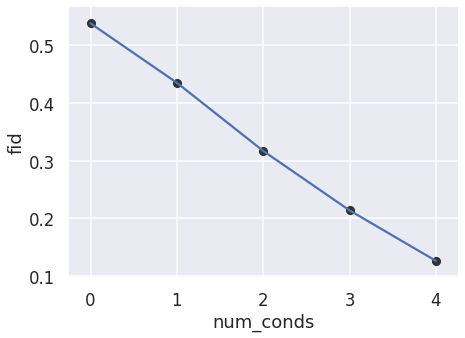

In [18]:
make_fid_plot(args, model, X_test[0:10,:], C_test[0:10,:], save=False)

In [20]:
from CVAE_testbed.run_models.generative_metric import compute_generative_metric_synthetic

In [21]:
compute_generative_metric_synthetic(X_test[0,:], C_test[0,:], args, model)

torch.Size([256, 4]) torch.Size([256, 64]) torch.Size([256, 8])
torch.Size([256, 4])


0.14165471691951836

In [24]:
import numpy as np
np.log(10)


2.302585092994046

In [25]:
import numpy as np

In [29]:
np.mean(X_test[0,:].cpu().numpy(), axis=0)

array([ 0.1048177 , -0.01374189,  0.0371246 , -0.00662292], dtype=float32)

In [30]:
X_test.size()

torch.Size([10, 256, 4])

In [34]:
X_test[0:10, :].view(-1, X_test.size()[-1]).size()

torch.Size([2560, 4])